In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faisalaltaf06
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:00<00:00, 1.36GB/s]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Conv2D , MaxPooling2D , Dropout, BatchNormalization
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

In [5]:
dataset_path = "/content/gtsrb-german-traffic-sign/Train"
X_train = []
y_train = []
num_corrupted = 0

for label in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, label)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        if not img_name.lower().endswith(".png"):
            continue
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv.imread(img_path)
            if img is None:
                num_corrupted += 1
                continue
            img = cv.resize(img, (64, 64))
            X_train.append(img)
            y_train.append(int(label))
        except:
            num_corrupted += 1

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Number of corrupted images: {num_corrupted}")
print(f"Number of loaded images: {len(X_train)}")
print(f"Number of labels: {len(y_train)}")

Number of corrupted images: 0
Number of loaded images: 39209
Number of labels: 39209


In [6]:
base_path = "/content/gtsrb-german-traffic-sign"
csv_path = os.path.join(base_path, "Test.csv")

df = pd.read_csv(csv_path)

X_test = []
y_test = []
num_corrupted = 0

for idx, row in df.iterrows():
    img_rel_path = row["Path"]
    label = row["ClassId"]

    img_path = os.path.join(base_path, img_rel_path)
    try:
        img = cv.imread(img_path)
        if img is None:
            num_corrupted += 1
            continue
        img = cv.resize(img, (64, 64))
        X_test.append(img)
        y_test.append(label)
    except:
        num_corrupted += 1

X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Number of corrupted test images: {num_corrupted}")
print(f"Number of loaded test images: {len(X_test)}")
print(f"Number of test labels: {len(y_test)}")

Number of corrupted test images: 0
Number of loaded test images: 12630
Number of test labels: 12630


In [7]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 43


In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.001, random_state=42, shuffle=True
)

In [9]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_validation = np.array(X_validation) / 255.0

X_train = X_train.reshape(-1, 64, 64, 3)
X_test = X_test.reshape(-1, 64, 64, 3)
X_validation = X_validation.reshape(-1, 64, 64, 3)

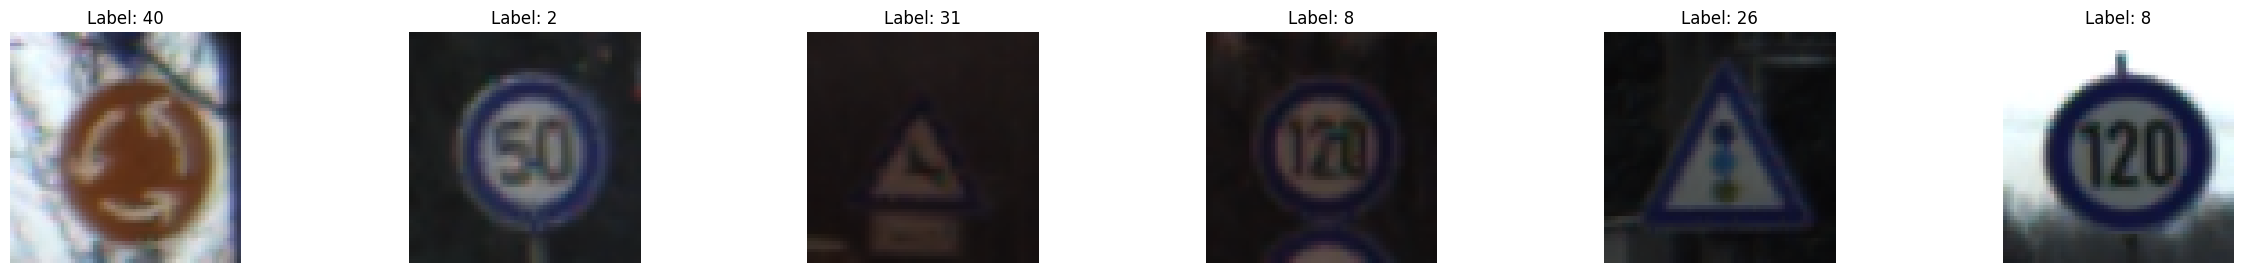

In [10]:
plt.figure(figsize=(30, 3))

for index, (image, label) in enumerate(zip(X_train[0:6], y_train[0:6])):
    plt.subplot(1, 6, index + 1)
    image = image.reshape(64, 64, 3)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()


In [11]:
model = Sequential([
    Conv2D(32 , (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history  = model.fit(
    X_train, y_train,
    epochs = 15,
    batch_size = 128,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop_cb]
)

Epoch 1/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.4969 - loss: 2.0057 - val_accuracy: 0.3500 - val_loss: 2.3352
Epoch 2/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9459 - loss: 0.1651 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 3/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9781 - loss: 0.0730 - val_accuracy: 1.0000 - val_loss: 7.4915e-05
Epoch 4/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 9.3483e-04
Epoch 5/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 5.2847e-04
Epoch 6/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 5.0077e-05
Epoch 7/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 1.0000 - val_loss: 5.4582e-05
Epoch 8/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0

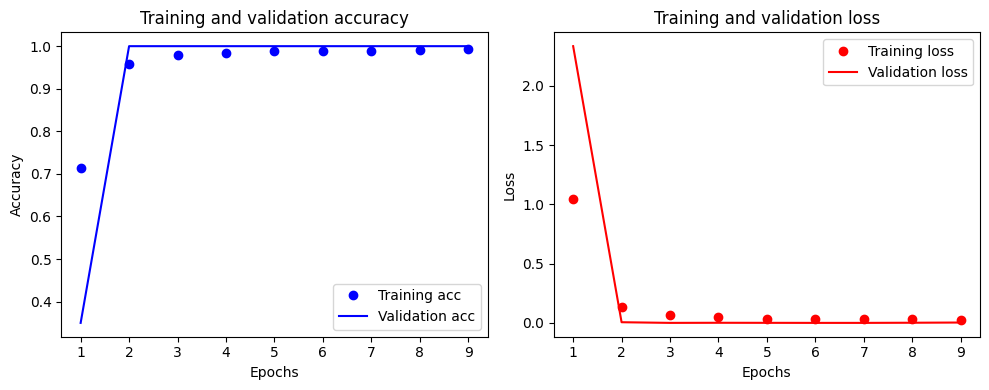

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
predictions = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [16]:
results = model.evaluate(X_test, y_test)
print('Test loss, Test Accuracy:', results)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9618 - loss: 0.1754
Test loss, Test Accuracy: [0.1699148416519165, 0.9634996056556702]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


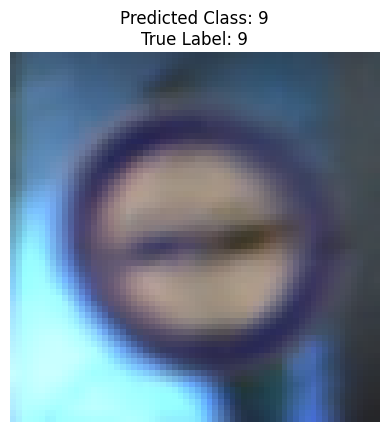

Model predicted class: 9
True class label: 9
Prediction is correct!


In [17]:
# Select a random image from the test set
random_index = np.random.randint(0, len(X_test))
unseen_image = X_test[random_index]
true_label = y_test[random_index]

# Reshape the image for prediction (add a batch dimension)
unseen_image_reshaped = unseen_image.reshape(1, 64, 64, 3)

# Make a prediction
prediction = model.predict(unseen_image_reshaped)
predicted_class = np.argmax(prediction)

# Display the image and the prediction result
plt.imshow(unseen_image)
plt.title(f"Predicted Class: {predicted_class}\nTrue Label: {true_label}")
plt.axis('off')
plt.show()

print(f"Model predicted class: {predicted_class}")
print(f"True class label: {true_label}")

# You can also check if the prediction is correct
if predicted_class == true_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

In [18]:
model_modern = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Use num_classes from previous cell
])

model_modern.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,562,219 (36.48 MB)

 Trainable params: 9,559,403 (36.47 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [19]:
model_modern.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history_modern = model_modern.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop_cb]
)

Epoch 1/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.6443 - loss: 1.4491 - val_accuracy: 0.3750 - val_loss: 2.2731
Epoch 2/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9920 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9973 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 5.5891e-04
Epoch 4/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9983 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 1.1257e-04
Epoch 6/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9986 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 7/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9000 - val_loss: 0.2096
Epoch 8/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9953 - loss: 0.0189 -

In [20]:
# Evaluate the modern model on the test set
results_modern = model_modern.evaluate(X_test, y_test)

print("Previous model test accuracy:", results[1])
print("Modern model test accuracy:", results_modern[1])

# Optional: You can also compare the loss
# print("Previous model test loss:", results[0])
# print("Modern model test loss:", results_modern[0])

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9759 - loss: 0.0807
Previous model test accuracy: 0.9634996056556702
Modern model test accuracy: 0.9752969145774841


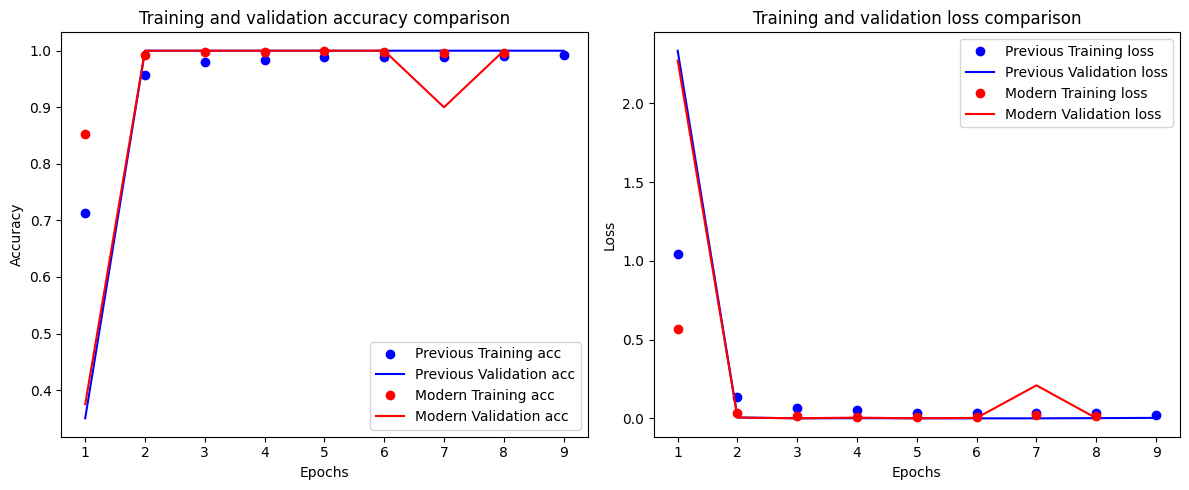

In [21]:
# Get the history data for both models
acc_prev = history.history['accuracy']
val_acc_prev = history.history['val_accuracy']
loss_prev = history.history['loss']
val_loss_prev = history.history['val_loss']

acc_modern = history_modern.history['accuracy']
val_acc_modern = history_modern.history['val_accuracy']
loss_modern = history_modern.history['loss']
val_loss_modern = history_modern.history['val_loss']

# Create epochs range for both models
epochs_prev = range(1, len(acc_prev) + 1)
epochs_modern = range(1, len(acc_modern) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_prev, acc_prev, 'bo', label='Previous Training acc')
plt.plot(epochs_prev, val_acc_prev, 'b', label='Previous Validation acc')
plt.plot(epochs_modern, acc_modern, 'ro', label='Modern Training acc')
plt.plot(epochs_modern, val_acc_modern, 'r', label='Modern Validation acc')
plt.title('Training and validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_prev, loss_prev, 'bo', label='Previous Training loss')
plt.plot(epochs_prev, val_loss_prev, 'b', label='Previous Validation loss')
plt.plot(epochs_modern, loss_modern, 'ro', label='Modern Training loss')
plt.plot(epochs_modern, val_loss_modern, 'r', label='Modern Validation loss')
plt.title('Training and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


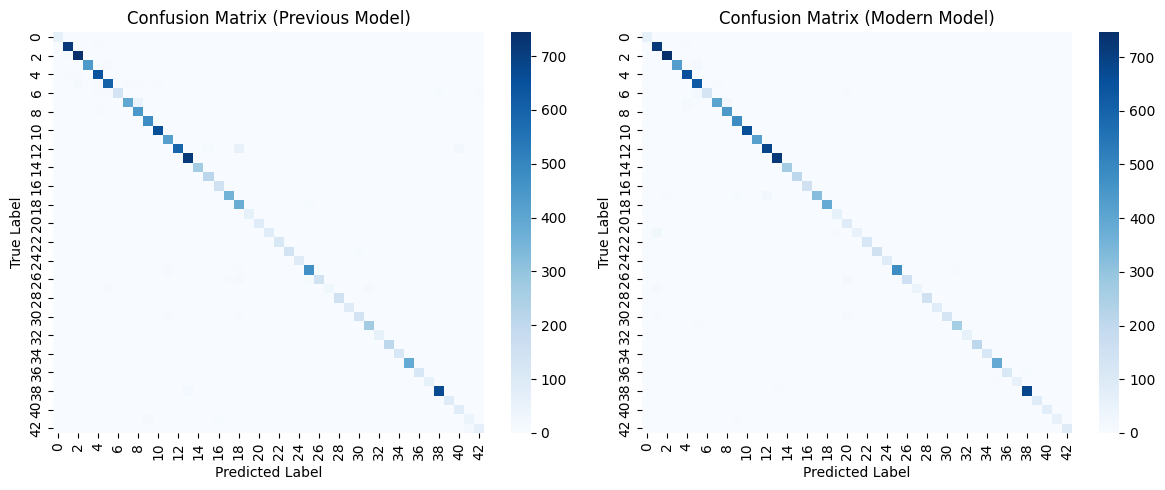

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for both models
predictions_prev = model.predict(X_test)
predicted_classes_prev = np.argmax(predictions_prev, axis=1)

predictions_modern = model_modern.predict(X_test)
predicted_classes_modern = np.argmax(predictions_modern, axis=1)

# Generate confusion matrices
cm_prev = confusion_matrix(y_test, predicted_classes_prev)
cm_modern = confusion_matrix(y_test, predicted_classes_modern)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_prev, annot=False, cmap='Blues')
plt.title('Confusion Matrix (Previous Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_modern, annot=False, cmap='Blues')
plt.title('Confusion Matrix (Modern Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation steps
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False, # Keep False for traffic signs
    vertical_flip=False,   # Keep False for traffic signs
    fill_mode='nearest'
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Compile the previous model again (if needed, but it was already compiled)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the previous model with data augmentation
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history_augmented = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=15,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 51s 150ms/step - accuracy: 0.8273 - loss: 0.7558 - val_accuracy: 1.0000 - val_loss: 7.4355e-05
Epoch 2/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 43s 140ms/step - accuracy: 0.9369 - loss: 0.2089 - val_accuracy: 1.0000 - val_loss: 8.5786e-05
Epoch 3/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.9645 - loss: 0.1238 - val_accuracy: 1.0000 - val_loss: 3.5788e-05
Epoch 4/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9673 - loss: 0.1103 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 5/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 42s 137ms/step - accuracy: 0.9601 - loss: 0.1419 - val_accuracy: 1.0000 - val_loss: 7.2002e-05
Epoch 6/15
307/307 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step - accuracy: 0.9750 - loss: 0.0858 - val_accuracy: 1.0000 - val_loss: 1.5019e-04


Please enter the URL of the image: https://www.rhinocarhire.com/CorporateSite/media/Drive-Smart/Road-Signs/Warning-Signs/Germany-Warning-Sign-Warning-for-roadworks.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


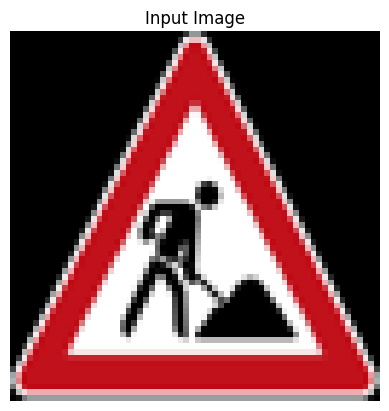

Previous model predicted class: 25
Modern model predicted class: 25


In [28]:
import requests
from PIL import Image
from io import BytesIO

# Input for the image URL
image_url = input("Please enter the URL of the image: ")

try:
    # Download the image from the URL
    response = requests.get(image_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Preprocess the image (resize, convert to array, normalize, reshape)
    img_resized = img.resize((64, 64))
    img_array = np.array(img_resized)
    img_processed = img_array / 255.0
    img_processed = img_processed.reshape(1, 64, 64, 3)

    # Make predictions with both models
    prediction_prev = model.predict(img_processed)
    predicted_class_prev = np.argmax(prediction_prev)

    prediction_modern = model_modern.predict(img_processed)
    predicted_class_modern = np.argmax(prediction_modern)


    # Display the image
    plt.imshow(img_array)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Display predictions from both models
    print(f"Previous model predicted class: {predicted_class_prev}")
    print(f"Modern model predicted class: {predicted_class_modern}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
except Exception as e:
    print(f"An error occurred: {e}")